In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv('StudentPerformanceFactors.csv')

In [50]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [51]:
df.shape

(6607, 20)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access

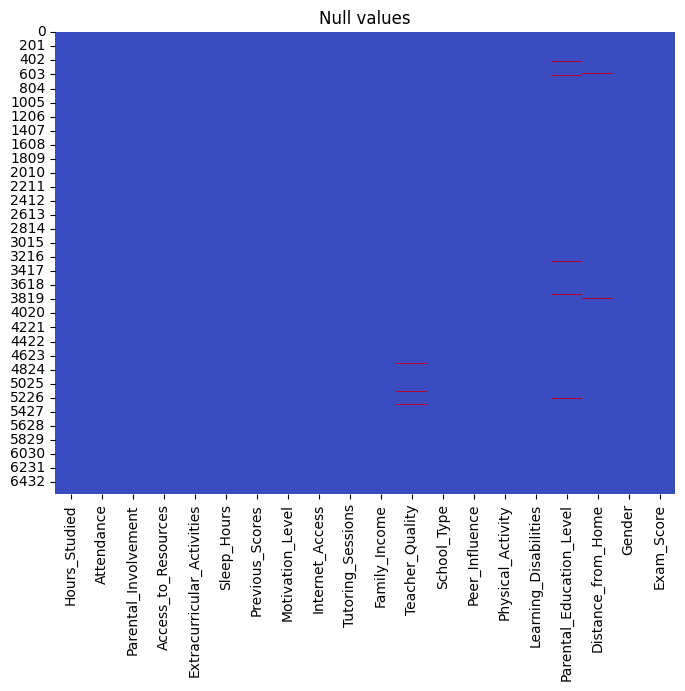

In [53]:
print(df.isnull().sum())
missing_percent=df.isnull().mean()*100
print(missing_percent)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cbar=False,cmap='coolwarm')
plt.title('Null values')
plt.show()

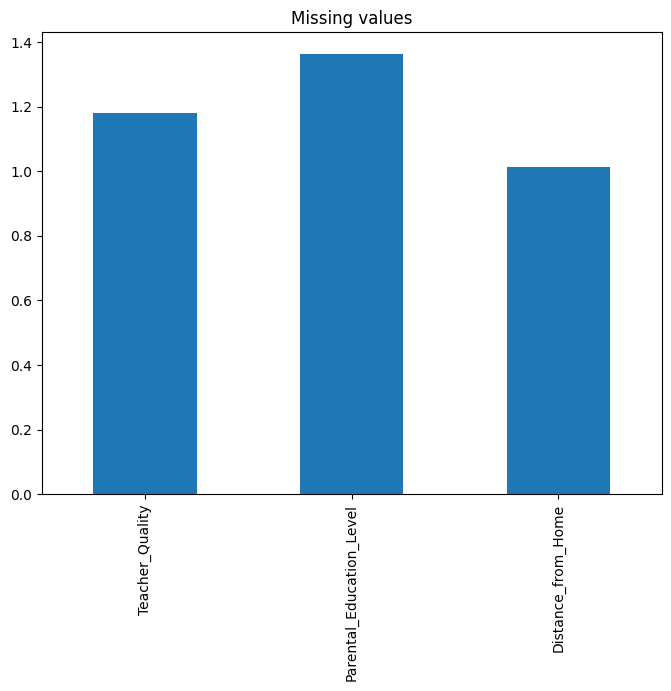

In [54]:
missing_percent=missing_percent[missing_percent>0]
missing_percent.plot(kind='bar',figsize=(8,6))
plt.title('Missing values')
plt.show()

In [55]:
cat_cols=df.select_dtypes(include=object).columns
for col in cat_cols:
  df[col]=df[col].fillna(df[col].mode()[0])

In [56]:
print(df.duplicated().sum())

0


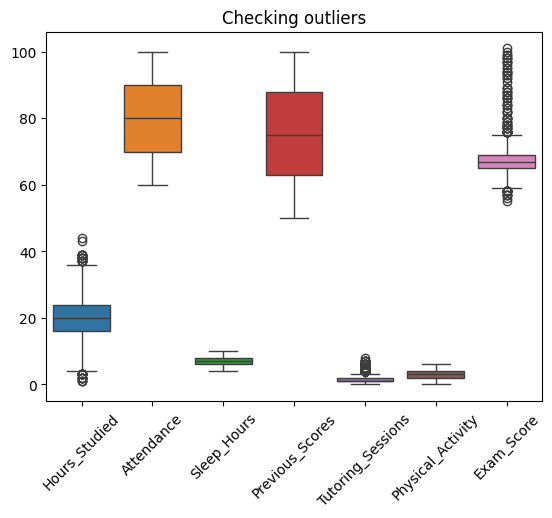

In [57]:
numeric_cols=df.select_dtypes(include=np.number).columns
sns.boxplot(df[numeric_cols])
plt.title('Checking outliers')
plt.xticks(rotation=45)
plt.show()

In [58]:
for col in numeric_cols:
  lower_limit=df[col].quantile(0.05)
  upper_limit=df[col].quantile(0.95)
  df[col]=np.where(df[col]>upper_limit,upper_limit,
                   np.where(df[col]<lower_limit,lower_limit,df[col]))

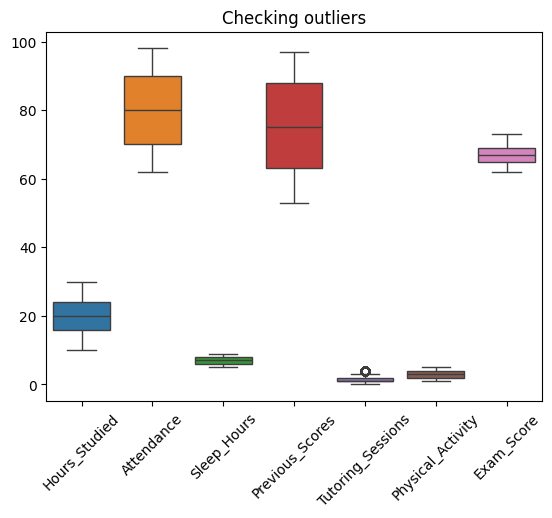

In [59]:
sns.boxplot(df[numeric_cols])
plt.title('Checking outliers')
plt.xticks(rotation=45)
plt.show()

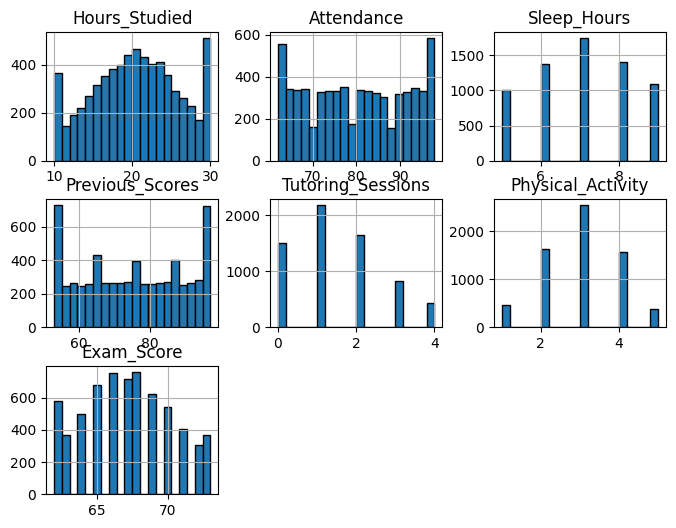

In [60]:
df[numeric_cols].hist(figsize=(8,6),bins=20,edgecolor='black')
plt.title('Histogram')
plt.show()

In [61]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000  6607.000000      6607.000000   
mean       19.977448    79.980778     7.028606        75.068412   
std         5.484457    11.385536     1.298220        14.115367   
min        10.000000    62.000000     5.000000        53.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        88.000000   
max        30.000000    98.000000     9.000000        97.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.468897           2.969729    67.153625  
std             1.162237           1.002264     3.109493  
min             0.000000           1.000000    62.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [62]:
print(df.describe(include=object))

       Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6607                6607                       6607   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                   3362                3319                       3938   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6607            6607          6607            6607   
unique                3               2             3               3   
top              Medium             Yes           Low          Medium   
freq               3351            6108          2672            4003   

       School_Type Peer_Influence Learning_Disabilities  \
count         6607           6607                  6607   
unique           2              3                     2   
top         Public       Positive                    No   
freq   

In [63]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19.0,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,62.0
2,24.0,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,73.0
3,29.0,89.0,Low,Medium,Yes,8.0,97.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,19.0,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0


In [64]:
df=pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [65]:
df.shape

(6607, 28)

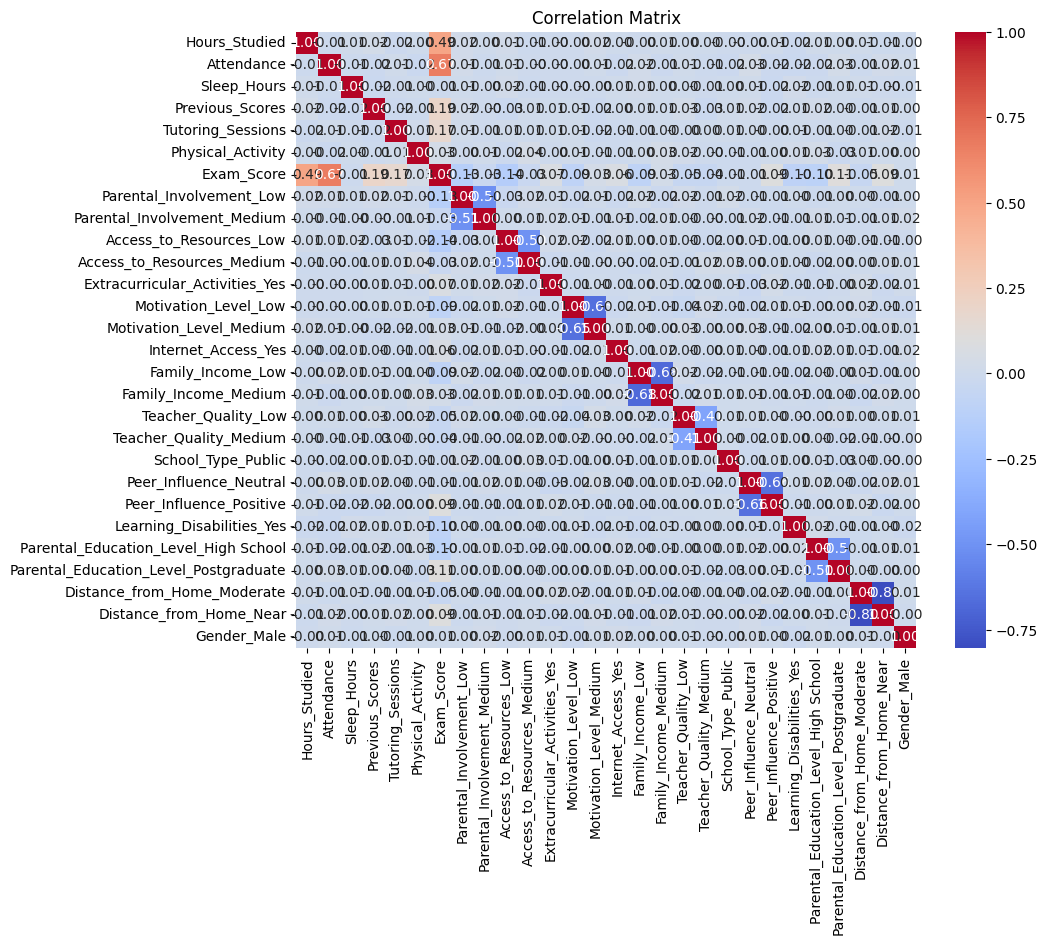

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [67]:
df.corr()['Exam_Score']

,Exam_Score
Hours_Studied,0.494132
Attendance,0.668200
Sleep_Hours,-0.010876
Previous_Scores,0.194826
Tutoring_Sessions,0.167843
Physical_Activity,0.033404
Exam_Score,1.000000
Parental_Involvement_Low,-0.129693
Parental_Involvement_Medium,-0.033933
Access_to_Resources_Low,-0.142691


In [68]:
df=df[['Hours_Studied','Attendance','Previous_Scores','Tutoring_Sessions','Exam_Score']]

In [69]:
X=df.drop('Exam_Score',axis=1)
y=df["Exam_Score"]

In [70]:
def categorize(score):
  if score<40:
    return 'C'
  elif score>70:
    return 'A'
  else:
    return 'B'

In [71]:
y=y.apply(categorize)

In [72]:
y.value_counts()

,count
Exam_Score,
B,5524
A,1083


In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [74]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [78]:
models={
    'LogisticRegression':LogisticRegression(C=1,solver='liblinear',random_state=1),
    'KNN':KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2),
    'DecisionTree':DecisionTreeClassifier(criterion='entropy',random_state=1),
    'RandomForest':RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=1),
    'SVC':SVC(kernel='linear',random_state=1),
    'Naive Bayes':GaussianNB()
}


In [79]:
from sklearn.metrics import accuracy_score

In [80]:
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(f"{name} Accuarcy score:{accuracy_score(y_pred,y_test)*100:.2f}%")

LogisticRegression Accuarcy score:91.00%
KNN Accuarcy score:88.58%
DecisionTree Accuarcy score:85.10%
RandomForest Accuarcy score:88.50%
SVC Accuarcy score:90.92%
Naive Bayes Accuarcy score:89.86%


In [81]:
param_grids = {
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    'RandomForest': {'n_estimators': [50, 100], 'max_depth': [None, 5, 10], 'criterion': ['gini', 'entropy']},
    'DecisionTree': {'max_depth': [None, 5, 10], 'criterion': ['gini', 'entropy']},
    'NaiveBayes': {},
    'KNN': {'n_neighbors': [3, 5, 7], 'metric': ['minkowski', 'euclidean']}
}

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
best_models={}

for name,model in models.items():
  print(f'Tunning{name}')
  if param_grids[name.replace(' ','')]:
    grid=GridSearchCV(model,param_grids[name.replace(' ','')],cv=5,scoring='accuracy',n_jobs=-1)
    grid.fit(X_train,y_train)
    best_models[name]=grid.best_estimator_
    print(f'Best parameters:{grid.best_params_}')
  else:
    model.fit(X_train,y_train)
    best_models[name]=model
    print("No hyperparameters to tune")

for name,model in models.items():
  y_pred=model.predict(X_test)
  print(f"{name} Accuracy score:{accuracy_score(y_pred,y_test)*100:.2f}%")

TunningLogisticRegression
Best parameters:{'C': 1, 'solver': 'liblinear'}
TunningKNN
Best parameters:{'metric': 'minkowski', 'n_neighbors': 7}
TunningDecisionTree
Best parameters:{'criterion': 'gini', 'max_depth': 5}
TunningRandomForest
Best parameters:{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
TunningSVC
Best parameters:{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
TunningNaive Bayes
No hyperparameters to tune
LogisticRegression Accuracy score:91.00%
KNN Accuracy score:88.58%
DecisionTree Accuracy score:85.10%
RandomForest Accuracy score:88.50%
SVC Accuracy score:90.92%
Naive Bayes Accuracy score:89.86%


In [84]:
best_model = best_models['RandomForest']

In [85]:
def predict_with_grade(hours_studied, attendance, previous_scores, tutoring_sessions):
    input_data = np.array([[hours_studied, attendance, previous_scores, tutoring_sessions]])
    input_data = sc.transform(input_data)

    pred = best_model.predict(input_data)[0]
    grade = le.inverse_transform([pred])[0]

    status = "PASS" if grade in ['A', 'B'] else "FAIL"

    return grade, status

In [86]:
grade, status = predict_with_grade(3, 60, 35, 0)
print(f"Grade: {grade}, Status: {status}")

Grade: B, Status: PASS


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [87]:
import pickle

In [88]:
with open('model.pkl','wb') as f:
  pickle.dump(best_model, f)

with open('scalar.pkl','wb') as f:
  pickle.dump(sc, f)

with open('label_encoder.pkl','wb') as f:
  pickle.dump(le, f)